<a href="https://colab.research.google.com/github/Balajilp/Statistics/blob/main/Crammer_V_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Integrating google colab with drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Crammer V Test
It is the extension of chi2 test,  chi2 test's output is the input to the Crammer V test.  Chi2 test only shows the significance of the value with target, other hand Crammer V test shows how much it is important (Stregh).
Crammer V test Score always raning between 0 to 1.  the concept is similar to covariance and pearson correlation coefficient. That's it

# Note:
There is no python package to do Crammer V Test.  We can manually do that.  Formula is give in the below go ahead.

In [2]:
# Filtering the Warning
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# loading the data
churn_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/churn_data_st.csv')

# printing the top 5 records
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [6]:
# taking the copy of the dataset
df = churn_df.copy()

In [7]:
# getting the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [8]:
# Checking the missing values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [9]:
# printing the shape of the dataframe
df.shape

(7043, 10)

In [10]:
df.corr()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,-0.090899,0.220173,0.100795
tenure,0.016567,1.000000,0.508526,0.247900,0.826066
ServiceCount,-0.090899,0.508526,1.000000,0.041463,0.443768
MonthlyCharges,0.220173,0.247900,0.041463,1.000000,0.650964
TotalCharges,0.100795,0.826066,0.443768,0.650964,1.000000


In [11]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

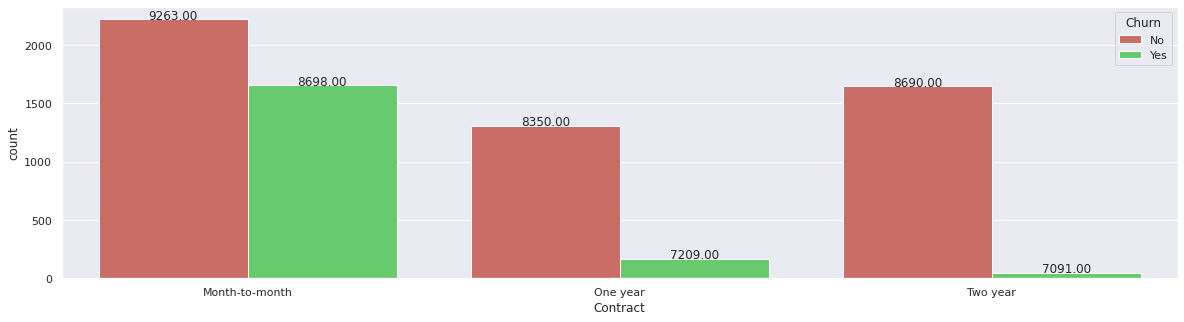

In [12]:
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.countplot(x='Contract', hue='Churn', data=df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3,
          "{:1.2f}".format(height+df.shape[0]),
          ha='center')

# Chi Square Statistics
#### x^2 = sum((Observed-Expected)^2/Expected)

## Crammer V Test
#### V = SQRT(chi2/(n*(min(C, R)-1)))

In [13]:
pd.crosstab(index=df.Contract, columns=df.Churn, margins=True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [14]:
contract_churn_ct = pd.crosstab(index=df.Contract, columns=df.Churn)
contract_churn_ct

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [19]:
from scipy import stats
(chi2, p, dof, _) = stats.chi2_contingency([contract_churn_ct.iloc[0].values, contract_churn_ct.iloc[1].values])

In [20]:
print('Chi2 : ', chi2)
print('P-Value : ', p)
print('Degree of Freedom : ', dof)

Chi2 :  468.4084443130493
P-Value :  7.113840265103799e-104
Degree of Freedom :  1


In [18]:
import numpy as np

np.sqrt(chi2/(df.shape[0]))

0.2578894130355515

### observations:
Here we can see than less number of correlation in betweeen chrun and contract

In [21]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

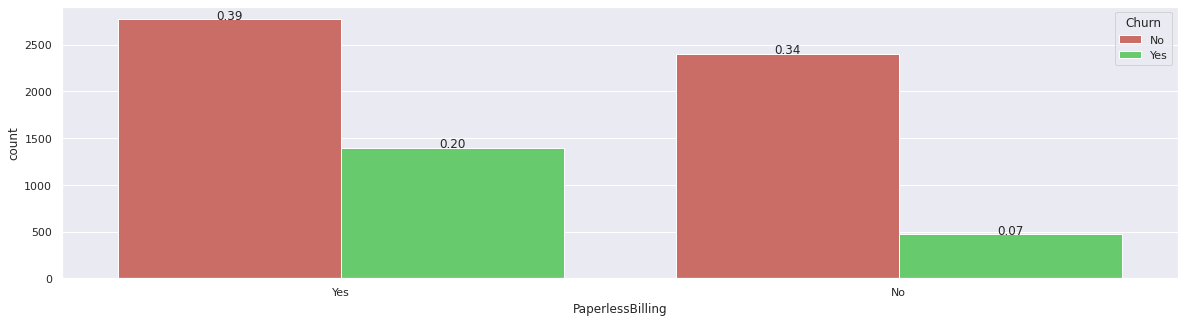

In [22]:
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3,
          "{:1.2f}".format(height/df.shape[0]),
          ha='center')

In [23]:
pb_churn_ct = pd.crosstab(index=df['PaperlessBilling'], columns=df['Churn'])

pb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [24]:
(chi2, p, dof, _) = stats.chi2_contingency([pb_churn_ct.iloc[0].values, pb_churn_ct.iloc[1].values])

In [25]:
print('Chi2 : ', chi2)
print('P-Value : ', p)
print('Degree of Freedom : ', dof)

Chi2 :  258.27764906707307
P-Value :  4.073354668665985e-58
Degree of Freedom :  1


In [26]:
# perform crammer v test
np.sqrt(chi2/(df.shape[0]))

0.19149814355338285

### observations  There is some significance But there is not much significance

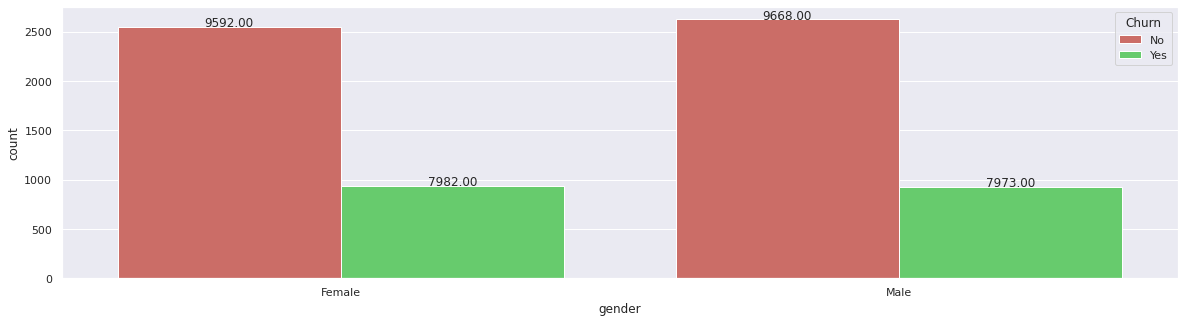

In [27]:
sns.set(style='darkgrid')
sns.set_palette('hls', 3)
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.countplot(x='gender', hue='Churn', data=df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3,
          "{:1.2f}".format(height+df.shape[0]),
          ha='center')

In [28]:
# contigious table(cross table) before applying chi square test we can do this
gender_churn_ct = pd.crosstab(index=df['gender'], columns=df['Churn'])

gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [29]:
(chi2, p, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

In [30]:
print('Chi2 : ', chi2)
print('P-Value : ', p)
print('Degree of Freedom : ', dof)

Chi2 :  0.4840828822091383
P-Value :  0.48657873605618596
Degree of Freedom :  1


In [31]:
# perform crammer v test
np.sqrt(chi2/(df.shape[0]))

0.008290505631771371